In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

### Reading the Data set 

In [107]:
df = pd.read_csv("adult.csv")

In [108]:
df.head(3)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


### Overview the Data 

In [109]:
## there is 32560 columns and 15 rows
df.shape

(32560, 15)

In [110]:
# column names Checking 
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [111]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.head(3)  ## Now the Column Names are meaningfull

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


### summary of data

In [112]:
df.info()
## there is total 15column 6 are int and 9 are Categorical
## and all row show not found any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Explore the Data type

##### First We Explore the Categorical 

In [113]:
categorical = [var for var in df.columns if df[var].dtype == 'O']  ## check datatype is "O"
print("Categorical {} Variable".format(len(categorical)))
print("Categorical Colums:\n",categorical)

Categorical 9 Variable
Categorical Colums:
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [114]:
df[categorical].head()
'''There are 9 categorical variables.
The categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex, native_country and income.
-->income is the target variable'''

'There are 9 categorical variables.\nThe categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex, native_country and income.\n-->income is the target variable'

### Missing Values in Categorical Columns

In [115]:
#### Check Missing Values in Categorical Columns
## there is not any missing data into these columns
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [116]:
## Frequency count of the Categorical valriable
for var in df[categorical]:
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [117]:
# check labels(rows values) in workclass Columns
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [118]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [119]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [120]:
## ? Replae with Nan
df['workclass'].replace(' ?', np.NaN, inplace=True)

In [121]:
# again check the frequency distribution of values in workclass variable
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [122]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
native_country       0
income               0
dtype: int64

### Explore occupation variable

In [123]:
# check labels in occupation variable
## So there found ? mark that not detected replaced with np.Nan
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [124]:
df['occupation'].replace(' ?',np.NaN,inplace=True)

In [125]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

### Explore native_country variable

In [126]:
## there is also a ' ?' in the label 
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [127]:
## Count the number of value
df['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [128]:
# We can see that there are 583 values encoded as ? in native_country variable. I will replace these ? with NaN
df['native_country'].replace(' ?',np.NaN,inplace=True)

In [129]:
# check frequency distribution of values in native_country variable
df['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

### Check missing values in categorical variables again

In [130]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

### Number of labels: cardinality
###### The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. 
###### High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [131]:
# check for cardinality in categorical variables
for var in categorical:
    print(var,"contain",len(df[var].unique()),"labels")

workclass contain 9 labels
education contain 16 labels
marital_status contain 7 labels
occupation contain 15 labels
relationship contain 6 labels
race contain 5 labels
sex contain 2 labels
native_country contain 42 labels
income contain 2 labels


##### We can see that native_country column contains relatively large number(42) of labels as compared to other columns. I will check for cardinality after train-test split.

### Explore Numerical Variables

In [132]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print("these are {} numerical columns:".format(len(numerical)))
print("Numerical Columns ",numerical)

these are 6 numerical columns:
Numerical Columns  ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [133]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


###### Summary of numerical variables¶There are 6 numerical variables.
###### These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
###### All of the numerical variables are of discrete data type

### Explore problems within numerical variables¶

In [134]:
# Now, I will explore the numerical variables.
# Missing values in numerical variable'''

#### Checking the Null values of Numerical Columns

In [135]:
# Checking the Null values
df[numerical].isnull().sum()
## We can see that all the 6 numerical variables do not contain missing values

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

8. Declare feature vector and target variable 

In [136]:
X = df.drop(['income'],axis=1)
y = df['income']

In [137]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [138]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

9. Split data into separate training and test set

In [139]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [140]:
# X_train,X_test ,check the shape 
X_train.shape,X_test.shape

((22792, 14), (9768, 14))

10. Feature Engineering

###### Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

######  First, I will display the categorical and numerical variables again separately.

In [141]:
# check data types in X_train
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [142]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [143]:
## display the Numerical Columns
numerical = [col for col in X_train.columns if X_train[col].dtypes!='O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [144]:
X_train[categorical].isnull().mean()

workclass         0.057432
education         0.000000
marital_status    0.000000
occupation        0.057696
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017331
dtype: float64

In [145]:
# print categorical variables with missing data
for col in categorical:
    if df[col].isnull().mean() > 0:
        print(col,(X_train[col].isnull().mean()))

workclass 0.057432432432432436
occupation 0.0576956826956827
native_country 0.01733064233064233


In [146]:
# impute missing categorical variables with most frequent value
for df2 in [X_train,X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0],inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0],inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0],inplace=True)  

In [147]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [148]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [149]:
# As a final check, I will check for missing values in X_train and X_test.
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [150]:
# check missing values in X_test
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

#### Encode categorical variables

In [151]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [152]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
21385,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,United-States
19749,Private,HS-grad,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,Vietnam
1216,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,China
30048,Federal-gov,Masters,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23077,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [153]:
import category_encoders as ce

In [154]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [155]:
X_train.head(2)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
21385,32,1,0,0,0,0,0,0,0,732102,...,0,0,0,0,0,0,0,0,0,0
19749,23,1,0,0,0,0,0,0,0,72887,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X_test.head(5)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
14160,38,1,0,0,0,0,0,0,0,680390,...,0,0,0,0,0,0,0,0,0,0
27047,45,0,0,0,0,0,1,0,0,50567,...,0,0,0,0,0,0,0,0,0,0
28867,29,1,0,0,0,0,0,0,0,185908,...,0,0,0,0,0,0,0,0,0,0
5667,51,1,0,0,0,0,0,0,0,306108,...,0,0,0,0,0,0,0,0,0,0
7827,46,1,0,0,0,0,0,0,0,124071,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_train.shape,X_test.shape

((22792, 105), (9768, 105))

###### We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

11. Feature Scaling 

In [158]:
cols = X_train.columns

In [159]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)


In [160]:
X_train


array([[-0.25,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.7 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.2 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.3 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.8 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.5 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [161]:
X_test

array([[ 0.05194805,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41558442, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.41558442,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.20779221,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.67532468,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51948052,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [162]:
## Convert in dataframe 
X_train = pd.DataFrame(X_train, columns =[cols])
X_test = pd.DataFrame(X_test, columns =[cols])

In [163]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.649359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.886948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.130124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.95,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.131533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.051948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.193259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.415584,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.065147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.415584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.068370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.467532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.451461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

In [165]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)

GaussianNB()

In [166]:
## Prediction 
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' >50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

14. Check accuracy score 

In [167]:
from sklearn.metrics import accuracy_score

print('Model accuracy score:{0:.10f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score:0.7965806716


###### Check for overfitting and underfitting

In [168]:
# print the scores on training and test set

print("X_Train data score {:.5f}".format(gnb.score(X_train,y_train)))
print("X_test Score {:.4f}".format(gnb.score(X_test,y_test)))

X_Train data score 0.79545
X_test Score 0.7966


###### The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.

####  Compare model accuracy with null accuracy
So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [169]:
y_test.value_counts()

 <=50K    7395
 >50K     2373
Name: income, dtype: int64

###### We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [170]:
# check null accuracy score
total = 7407 /(7395+2373)
print("Check the Null Accuracy {0:.4f}".format(total))

Check the Null Accuracy 0.7583


###### Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels

###### But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

###### We have another tool called Confusion matrix that comes to our rescue.

### Confusion Matrix

15. Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [171]:

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

NameError: name 'confusion_matrix' is not defined

. The confusion matrix shows 5838 + 1943 = 7781 correct predictions and 1557+430 =1997 incorrect predictions.
In this case, we have
True Positives (Actual Positive:1 and Predict Positive:1) - 5838
True Negatives (Actual Negative:0 and Predict Negative:0) - 1943
False Positives (Actual Negative:0 but Predict Positive:1) - 1557 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 430 (Type II error)

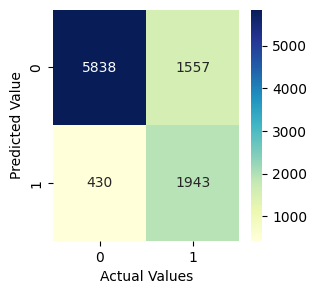

In [ ]:
sns.heatmap(data= cm,annot=True, fmt='d', cmap='YlGnBu')
fig = plt.gcf()
fig.set_size_inches(3, 3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value')
plt.show()

16. Classification metrices 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.85      7395
        >50K       0.56      0.82      0.66      2373

    accuracy                           0.80      9768
   macro avg       0.74      0.80      0.76      9768
weighted avg       0.84      0.80      0.81      9768



### Classification accuracy

In [ ]:
TP = cm[0,0] ## actual postive ,predict postive
TN = cm[1,1] ## actual negative and predict Negative
FP = cm[0,1] ## actual Negative predict postive
FN = cm[1,0] ## actual postive predict negative

### Classification Accuracy 

In [ ]:
classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print("classification_accuracy: {0:4f}".format(classification_accuracy))

classification_accuracy: 0.796581


### Classification error

In [ ]:
classification_error = (FP+FN) / float(TP+TN+FP+FN)
print("classifiation_error:{:.5f}".format(classification_error))

classifiation_error:0.20342


### Precision 

###### (Correctly Predictive Postive Outcomes)/(All Predictive Postive outcomes)
##### TP /(TP+FP) 

In [ ]:
# Precision can be defined as the percentage of correctly predicted positive outcomes
# out of all the predicted positive outcomes.
## It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP)
precision = TP / (TP+FP)
print("Precision Score is {:.4f} ".format(precision))


Precision Score is 0.7895 


**Recall Score**

Recall can be defined as the percentage of **correctly predicted positive outcomes** out of 
**all the actual positive outcomes**. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.
Mathematically, recall can be given as the ratio of TP to (TP + FN)

In [ ]:
recall = TP/float(TP+FN)
print("Recall score is {:.4f}".format(recall))

Recall score is 0.9314


In [ ]:
# True Positive Rate
# True Positive Rate is synonymous with Recall.
true_postive_rate = TP/(TP+FN)
print("true postive rate is {:.4f}".format(true_postive_rate))


true postive rate is 0.9314


In [ ]:
# False Positive Rate
false_postive_rate  = FP /(FP+FN)
print("false_postive_Rate is  {:.4f}".format(false_postive_rate))

false_postive_Rate is  0.7836


In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[9.99999907e-01, 9.33319334e-08],
       [3.18391875e-01, 6.81608125e-01],
       [1.05547606e-01, 8.94452394e-01],
       [6.69230871e-01, 3.30769129e-01],
       [9.69720432e-01, 3.02795683e-02],
       [9.99992153e-01, 7.84706910e-06],
       [1.00000000e+00, 1.21921680e-10],
       [9.63940089e-01, 3.60599107e-02],
       [1.46219178e-02, 9.85378082e-01],
       [9.99999157e-01, 8.43346442e-07]])

In [ ]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob,columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df.head(10)

,Prob of - <=50K,Prob of - >50K
0,1.000000,9.333193e-08
1,0.318392,6.816081e-01
2,0.105548,8.944524e-01
3,0.669231,3.307691e-01
4,0.969720,3.027957e-02
5,0.999992,7.847069e-06
6,1.000000,1.219217e-10
7,0.963940,3.605991e-02
8,0.014622,9.853781e-01
9,0.999999,8.433464e-07


In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([9.33319334e-08, 6.81608125e-01, 8.94452394e-01, 3.30769129e-01,
       3.02795683e-02, 7.84706910e-06, 1.21921680e-10, 3.60599107e-02,
       9.85378082e-01, 8.43346442e-07])

In [ ]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]
y_pred1

array([9.33319334e-08, 6.81608125e-01, 8.94452394e-01, ...,
       7.47737250e-01, 7.70781679e-07, 1.66134470e-05])

In [ ]:
# store the predicted probabilities for class 0 - Probability of <50K
y_pred2 = gnb.predict_proba(X_test)[:,0]
y_pred2

array([0.99999991, 0.31839188, 0.10554761, ..., 0.25226275, 0.99999923,
       0.99998339])

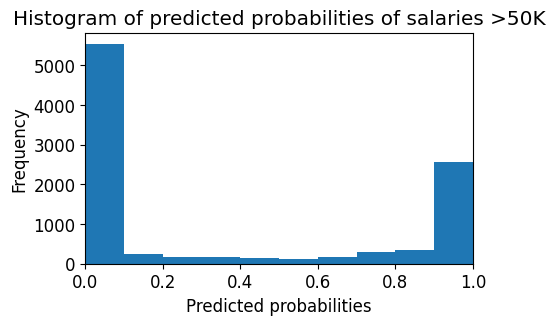

In [ ]:
import matplotlib.pyplot as plt

# Adjust font size
plt.rcParams['font.size'] = 12

# Adjust figure size
plt.figure(figsize=(5,3))

# Plot histogram with 10 bins
plt.hist(y_pred1, bins=10)

# Set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# Set the x-axis limit
plt.xlim(0, 1)

# Set x-axis label
plt.xlabel('Predicted probabilities')

# Set y-axis label
plt.ylabel('Frequency')

# Display the plot
plt.show()


Observations

We can see that the above histogram is highly positive skewed.
The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.
There are relatively small number of observations with probability > 0.5.
So, these small number of observations predict that the salaries will be >50K.
Majority of observations predcit that the salaries will be <=50K.

c:\Users\lenovo\miniconda3\envs\ramadan_batch\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


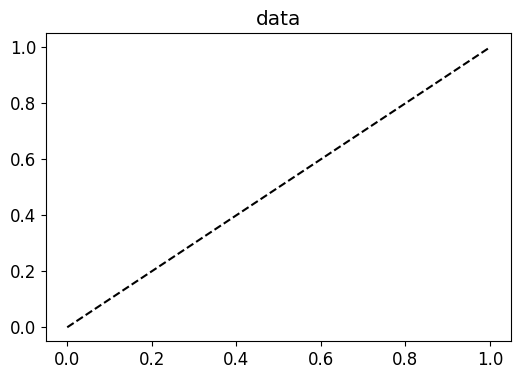

In [180]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold = roc_curve(y_test,y_pred1,pos_label='50k')
plt.figure(figsize=(6,4))
plt.rcParams['font.size']= 12
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=2)
plt.title("data")

plt.xlabel("")
plt.ylabel("")
plt.show()

c:\Users\lenovo\miniconda3\envs\ramadan_batch\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


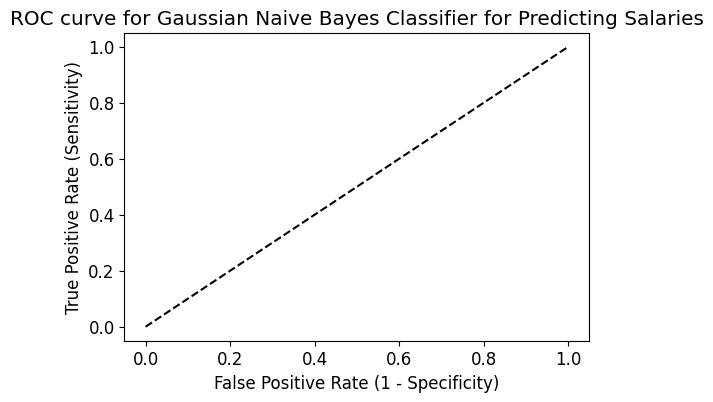

In [179]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [181]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8939


In [ ]:
Dear Client,

I have multiple questions regarding your requirements. Could you please provide additional details?
Could you provide more details about the data sources that will be used for these reports?
Is there a particular visual style or design preference you have in mind for the dashboards?
Are there any specific metrics or key performance indicators (KPIs) that should be included in the dashboards?
What is the expected timeframe or deadline for completing this project?

I have attached examples of my Power BI work, adding that showcasing my specialization in data analysis using Python. My expertise encompasses various areas including data cleaning and preprocessing, data visualization using tools like Seaborn and Matplotlib, as well as conducting exploratory data analysis

I assure you of my full dedication to your work. If you are unsatisfied with the results, you have the authority to withhold payment. I understand the importance of building my profile and greatly value your appreciation and feedback.


May you and your family live long with good health and happiness
Regards 
Danish Mehmood

